# Newtonova metoda hledání kořene funkce

Princip Newtonovy metody je vidět na obrázku


Funkci $f(x)$ nahradíme prvním diferenciálem $f(x_0+dx)\approx f(x_0)+ f'(x_0) dx$ a hledáme $dx=x_1-x_0$ tak aby

$$
f(x_1)= f(x_0+dx) \approx f(x_0)+ f'(x_0) (x_1-x_0) = 0  \longrightarrow x_1 = x_0 -\frac{f(x_0)}{f'(x_0)}
$$

Iterace pak znamená, že proces opakujeme pro $x_2, x_3, ...$, tedy

$$
 x_{k+1} = x_k -\frac{f(x_k)}{f'(x_k)}
$$

Obrázek také ilustruje, že při řešení mohou nastat potíže: pokud začneme *dále* od správné hodnoty kořene:
1. můžeme skončit u jiného kořene, 
2. nebo může postup selhat.

![](http://utf.mff.cuni.cz/~ledvinka/CvProgFyz/Pascal/pas2018/newton.png "Newtonoma metoda tečen")


Pro pochopení vlastností Newtonovy metody i jejích záludností budeme hledat kořeny polynomu

$$
f(x) = (x^2-4)(x^2-1) = x^4-5x^2+4, ~~~f'(x) = 4x^3-10x
$$

![](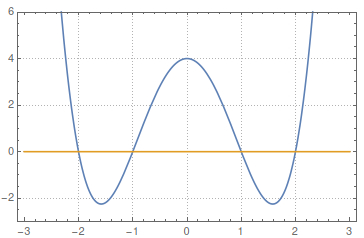  "Polynom (x^2-4)(x^2-1)")

Nejprve se podíváme na situaci, kdy metoda výborně funguje

In [3]:
x = 3.2
eps = 1E-3 # záměrně velké, abychom viděli nějakou výslednou chybu

while True:
    x2 = x*x
    f  = (x2-5)*x2+4
    f1 = (4*x2-10)*x
    print(x, "\t", f)

    x = x - f/f1

    if abs(f)<eps:
         break;

print(x, "\t", (x*x-5)*x*x+4)

3.2 	 57.65760000000003
2.6180232558139536 	 16.707714549688006
2.2515936414577156 	 4.353224087263561
2.063496151239523 	 0.8406215437578703
2.005564761411108 	 0.06736688128648538
2.0000484044324756 	 0.0005808977074059918
2.0000000037093155 	 4.451178625686225e-08


Výše jsme funkci a derivaci přímo zapsali do cyklu a pak ještě jednou do posledního příkazu *print*, bylo by rozuné to oddělit.

Komplikaci představuje fakt, že kromě funkční hodnoty potřebujeme znát i derivaci v tomtéž bodě. 
Zde je rozumné použít prostředky daného konkrétního programovacího jazyka. 

Nejprve zůstaneme v jazyce **Python** a použijeme tzv. tuples, jednoduše několik výrazů oddělených čárkami ve společné závorce. 

Následuje příklad funkce vracející najednou $( f(x), f'(x) )$ a několik způsobů použití

In [4]:
def f_f1(x):
    x2 = x*x
    return (  (x2-5)*x2+4, (4*x2-10)*x )

print( 'prvni print:', f_f1(1)  )     # používáme to najdenou

gg1    = f_f1(3)       # přiřadíme to najdenou

(g,g1) = f_f1(3)       # při přiřazení to rozebereme na jednoduché proměnné

print(gg1, g, g1)

prvni print: (0, -6)
(40, 78) 40 78


Nyní již můžeme napsat rozumně Newtonovu metodu

In [6]:
def f_f1(x):
    x2 = x*x
    return (  (x2-5)*x2+4, (4*x2-10)*x )

x = -2/3
eps = 1E-4 # stále záměrně velké, abychom viděli nějakou výslednou chybu

while True:
    (f,f1)  = f_f1(x)
    print(x, "\t", f)

    x = x - f/f1

    if abs(f)<eps:
         break;

print(x, "\t", f_f1(x)[0])   # nechceme tisknout derivaci, proto '[0]'

-0.6666666666666666 	 1.975308641975309
-1.0270270270270272 	 -0.16135219973097392
-0.9998500954967178 	 0.0008994494775800277
-0.9999999962594512 	 2.2443292557738914e-08
-1.0 	 0.0


Pro *praktické* použití časem toto ještě vylepšíme tak, abychom mohli jednoduše psát 
```
y = korenNewton(f_f1, x, 3)
```

Nyní se podíváme do jazyka Pascal. Tam *tuples* (česky často překládáno jako *n*-tice), které by umožnily jedním přiřazovacím příkazem přiřadit do dvojice proměnných, nejsou. 
Rozumný prosředek je procedura s více argumenty, kde dva jsou předávány odkazem a slouží právě k navrácení $f$ a $f'$. 
Proto můžeme mít např.
```
program korenN;

procedure spocti_f_f1(x:real; var f, f1:real);
var x2:real;
begin
    x2 := x*x;
    f  := (x2-5)*x2+4;
    f1 := (4*x2-10)*x;
end;


var   x,f,f1: real;
const eps = 1E-4;
begin
    x :=3; 

    repeat
        spocti_f_f1(x, f, f1);

        writeln(x,f);

        x := x - f / f1;
    until abs(f)<eps;
  
    spocti_f_f1(x, f, f1);

    writeln(x,f);
end.
```
S výstupem 
```
 3.0000000000000000E+000 4.0000000000000000E+001
 2.4871794871794872E+000 1.1337051604082408E+001
 2.1780286745170105E+000 2.7846784112147738E+000
 2.0355776438577391E+000 4.5134319912647847E-001
 2.0018512927314820E+000 2.2280681959564674E-002
 2.0000054032836401E+000 6.4839958395790376E-005
 2.0000000000462257E+000 5.5470827931003441E-010
```



Nyní se vrátíme k otázce, s jakou hodnotou při použití Newtonovy metody začít.
Obvyle se problém demonstruje tak, že volíme různé hodnoty a zkoumáme, jak to dopadne.

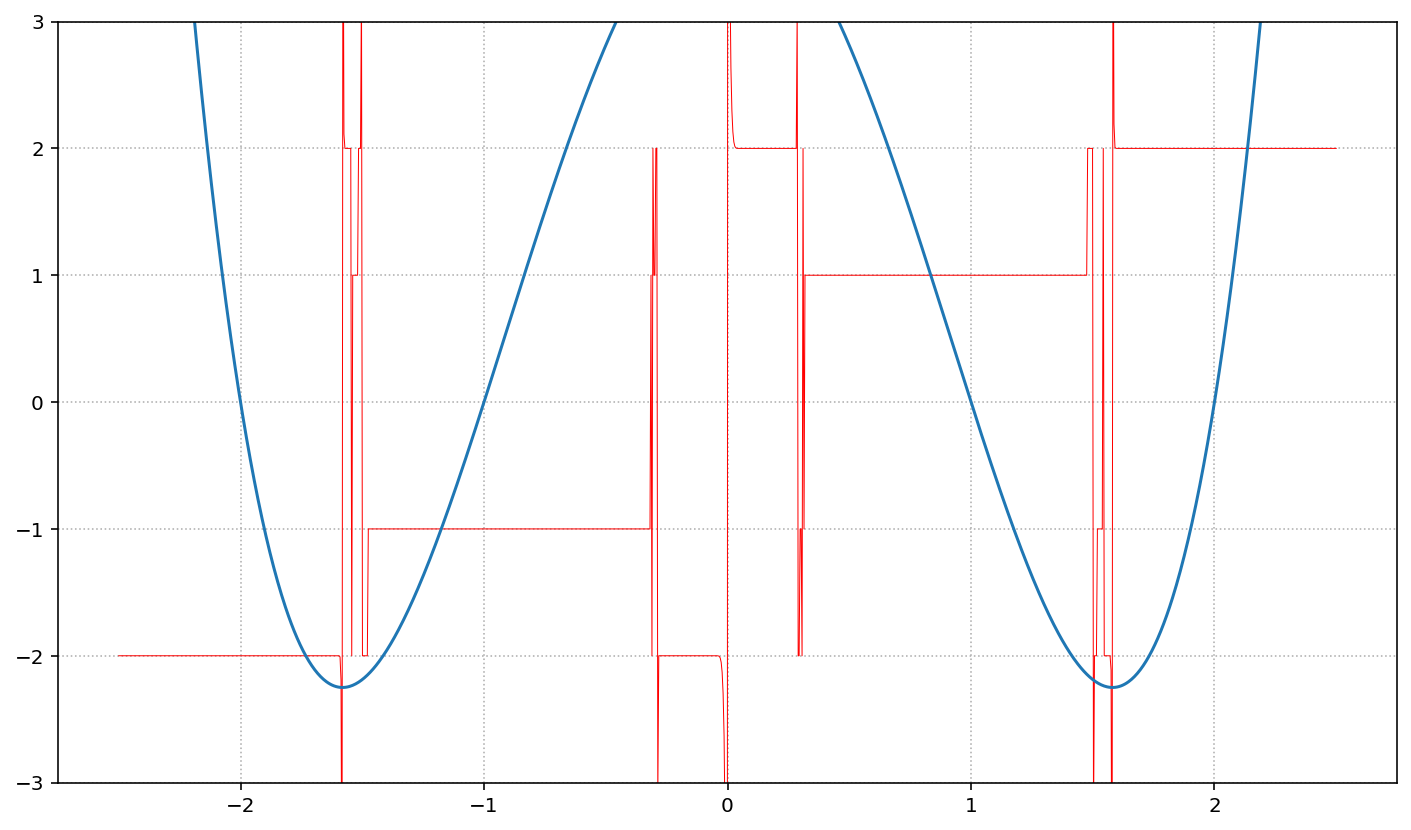

In [17]:
def f_f1(x):
    x2 = x*x
    return (  (x2-5)*x2+4, (4*x2-10)*x )

def newtonRoot_f(x,n):
    for k in range(n):
        (f,f1)  = f_f1(x)
        x = x - f/f1
    return x

def newtonRoot_feps(x,eps):

    while True:
        (f,f1)  = f_f1(x)
        x = x - f/f1
        if abs(f)<eps:
            break;

    return x


pocetBodu = 1250  # sudý počet => netrefíme x==0, kde f'(0) == 0
a = -2.5
b = 2.5

X = [a+(b-a)*k/(pocetBodu-1) for k in range(pocetBodu) ]
Y = [newtonRoot_f(x,10) for x in X]
F = [f_f1(x)[0] for x in X]

import matplotlib.pyplot as plt
plt.plot(X,Y,linewidth=0.5,color='red')
plt.plot(X,F)
plt.ylim(-3,3)
plt.grid(linestyle='dotted')
plt.show()


Pokud výše nastavíme podrobnější vzorkování na ose k (k tomu slouží `pocetBodu`) uvidíme, že v určitých oblastech je těžké uhodnou, 
ke kterému kořenu se nakonec výsledek přikloní. (Viz "Newton fractal" na wikipedii). Tato vlastnost je nejlépe vidět v případě, 
že Newtonovou metodu hledáme komplexní kořeny nějaké funkce (aby platil příslušný vztah, musí u dané funkce existovat první 
diferenciál ve smyslu komplexního násobení!). Tam totiž kořeny a hlavně počáteční body nemusí ležet na přímce, nábrž kdekoli 
v komplexní rovině, jejíž plochu můžeme obarvit podle toho "jak to dopadne".

Proto zkusíme obdobu minulého obrázku nakreslit pro polynom 

$$
f(x)=(x+1+i)(x-1+i)(x+1-i)(x-1-i)=x^4+4
$$

Uvidíme, že získat hezký obrázek dá trochu práce, a že budeme muset problém rozdělit na několik jednodušších. 

Nejprve něco o komplexních číslech a jeden zajímavý způsob dvojice cyklů.

In [8]:
# komplexní čísla
a = complex(0,1)
print('i^2=', a*a )
print('Re(a)=', a.real, ', Im(a)=', a.imag)

# cykly a pole
X = [1,2,3]
print('X =', X )
Y = [100*x for x in X]
print('Y =', Y )
Z = [(p+q) for p in X for q in Y]
print('Z =', Z )

i^2= (-1+0j)
Re(a)= 0.0 , Im(a)= 1.0
X = [1, 2, 3]
Y = [100, 200, 300]
Z = [101, 201, 301, 102, 202, 302, 103, 203, 303]


Nyní již můžeme vše zkombinovat

# Newtonův fraktál

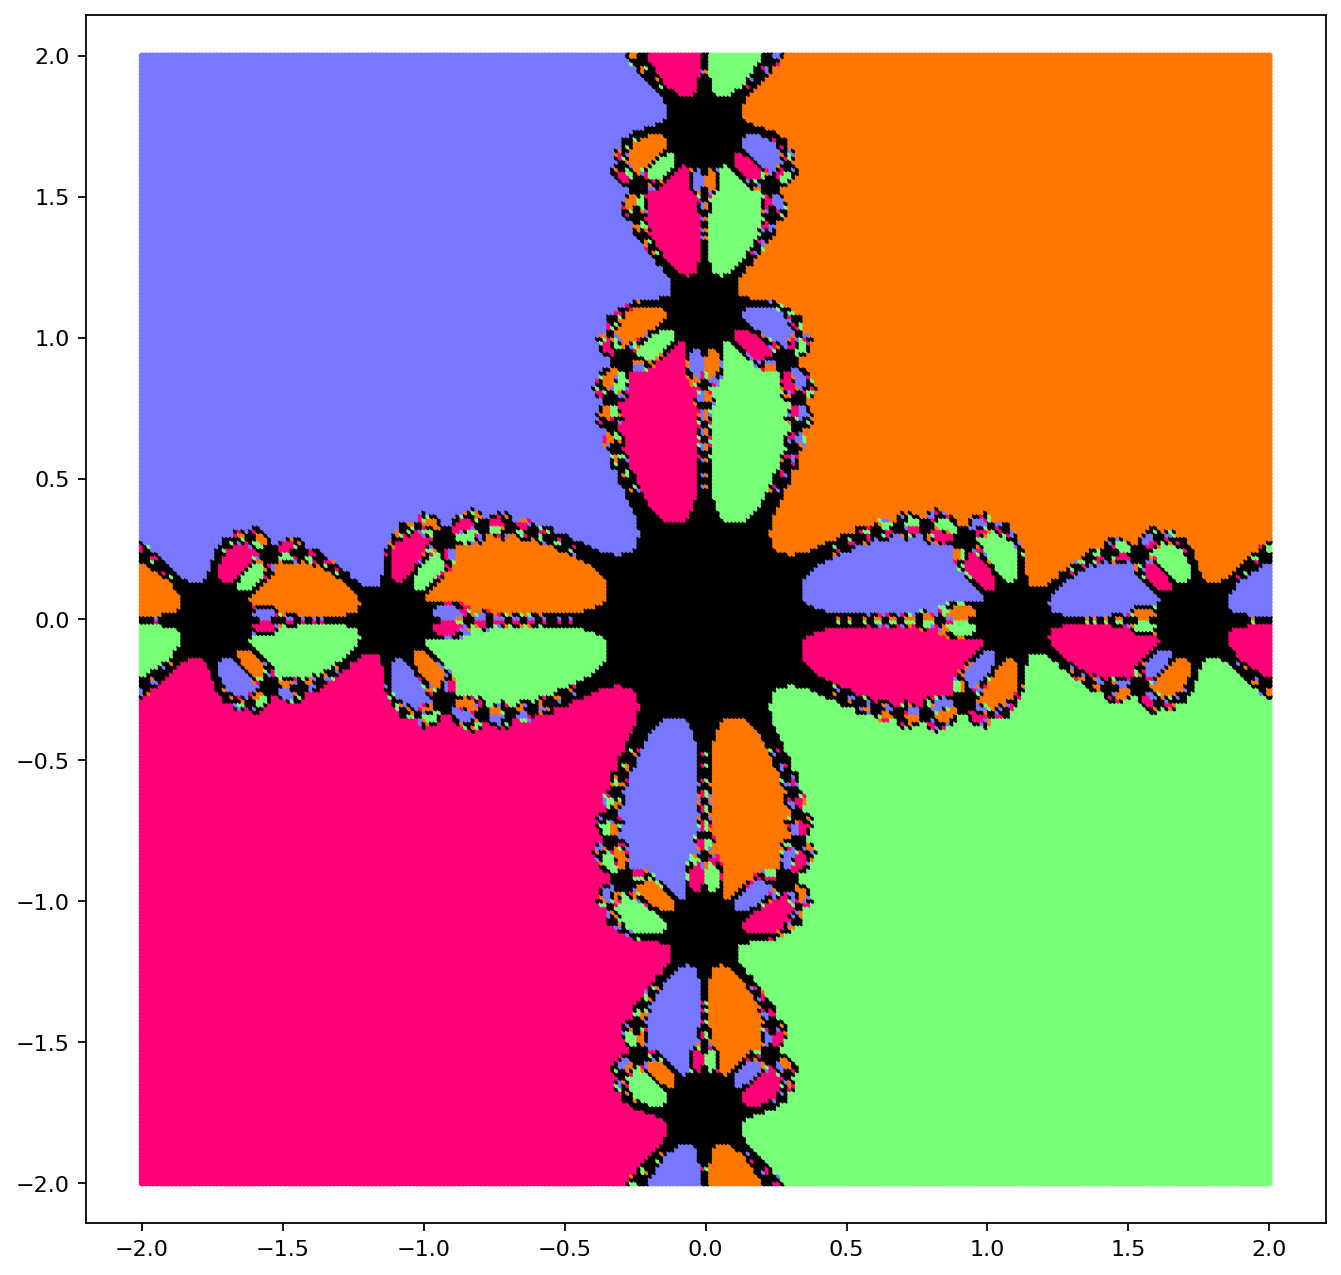

In [22]:
def f_f1(x):                     #jiný polynom
    x2 = x*x
    return (  x2*x2+4, 4*x2*x )

def newtonRoot_f(x,n):           # beze změny  
    for k in range(n):
        (f,f1)  = f_f1(x)
        x = x - f/f1
    return x

def barva(s):                    # převod komplexního výsledu iterace na barvu
    eps=0.01
    koreny = [complex(1,1),complex(1,-1),complex(-1,1),complex(-1,-1)]
    barvy = ['#ff7700','#77ff77','#7777ff','#ff0077']

    for k in range(len(koreny)):
        if abs(s-koreny[k]) < eps:
            return barvy[k];

    return '#000000'              # černá znamená, že nejsme poblíž něketerého z kořenů


pocetBodu = 300                   # opatrně se zvětšováním + musí být sudé !
a = -2
b = +2

X = [a+(b-a)*k/(pocetBodu-1) for k in range(pocetBodu) ]  # viz výklad
Z = [complex(re,im) for re in X for im in X ]
Y = [newtonRoot_f(z,12) for z in Z]

reY = [z.real for z in Z]
imY = [z.imag for z in Z]
C = [barva(y) for y in Y]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), dpi= 80)          # velikost obrázku
plt.scatter(reY,imY,c=C,s=(600/pocetBodu)**2)  # c... pole barev, s... jedna velikost
plt.axis('equal')                              # isotropní osy
plt.show()

Tentýž problém v Pascalu

- používá jiný způsob návratu $f, f'$

- komplexní čísla jsou v modulu `ucomplex`, vše je pak intuitivní, jen zformování komplexního čísla $3-2i$ má podobobu `cint(3,-2)`

- musí odrážet jiný způsob kreslení obrázků. Program tedy bude spočetené hodnoty zapisovat do souboru a jeho obsah pak vykreslíme `gnuplot`em.

- výstup bude mít podobu tří sloupců
```
x y barva
```

- příkazy pro vykreslení (isotropní škálování + malé hranaté puntíky, pt=pointtype, ps=pointsize) 
```
set size ratio -1
plot 'barvy.txt' using 1:2:3 palette pt 5 ps 0.25
```

Zde je výsledný kód

```
program nfrac;
uses ucomplex;

procedure spocti_f_f1(x:complex; var f, f1:complex);
var x2:complex;
begin
    x2 := x*x;
    f  := x2*x2+4;
    f1 := 4*x2*x;
end;

function newtonRoot_f(x: complex; n:integer): complex;
var f,f1:complex;
begin
    while n>0 do begin
        spocti_f_f1(x, f, f1);
        x := x - f / f1;
        n := n-1;
    end;
    newtonRoot_f := x;
end;


function barva(s: complex): integer;
const eps=0.01;
begin
    // funkce předpokládá kořeny ±1±i
    if sqr(abs(s.Re)-1)+sqr(abs(s.Im)-1)<sqr(eps) then
        barva := round((5 + s.Re + 2*s.Im)/2)
    else
        barva := 0;
end;

const pocetBodu = 1000;     // musí být sudé !
      a = -2;
      b = +2;

var x,y  : real;
    z    : complex;
    i,j,c: integer;
    txt  : text;
begin
   assign(txt,'barvy.txt');
   rewrite(txt);
   for i := 0 to pocetBodu-1 do   // ponecháváme meze z range(pocetBodu)
       for j := 0 to pocetBodu-1 do begin
           x := a + (b-a)*i/(pocetBodu-1);  // vytknutí před cyklus by neprospělo čitelnosti
           y := a + (b-a)*j/(pocetBodu-1);
           z := cinit(x,y);
           c := barva( newtonRoot_f( z, 12 ) );
           writeln(txt,x,' ',y,' ',c);
       end;
   close(txt);
end.
```



## Domácí úloha

**Nalezněte velikost kulové úseče (vrchlíku) daného objemu.**

Vysvětelní, příslušný vztah
$$
V = \pi v^2 \left(r-v/3\right)
$$
vede na kubickou rovnici pro $v$. Vzhledem ke složitosti vztahů pro kořen takové rovnice je Newtonova metoda optimální alternativou, pokud tušíte, kde začít. U této rovnice se nabízí nejprve položit výraz v závorce rovný $r$, pak lze odmocněním spočíst $v$ a tuto hodnotu použít jako výchozí pro Newtonovu metodu.

Napište funkci `vyskaUsece(r,V)` která pro $V\in <0,4/3 \pi r^3>$ spočte $v$. Demonstrujte, že s výše uvedenou počáteční volbou funkce vrací rozumnou hodnotu na požadovaném intervalu hdonot $V$.

